# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

In [10]:
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 31.4MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556427 sha256=52c7dec3fb4dc7678267eede47ded9299d09b4d681922622ee5b3dedb5d54930
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [3]:
%cd /content/drive/MyDrive/Clustering Assignment Applied Ai

/content/drive/MyDrive/Clustering Assignment Applied Ai


In [4]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [5]:
edges = [tuple(x) for x in data.values.tolist()]

In [6]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [7]:
A = list(nx.connected_component_subgraphs(B))[0]

In [8]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


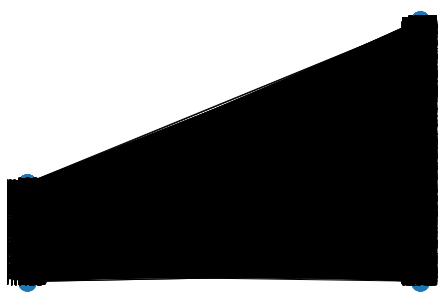

In [9]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [10]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [11]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

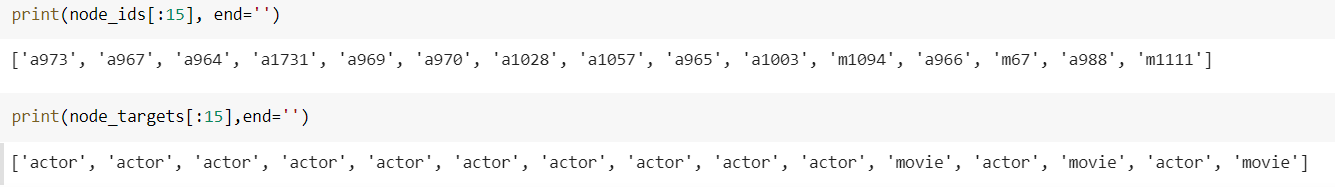

In [17]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for i in range (len(walks)):
      if node_targets[i]== 'actor':
        actor_embeddings.append(node_embeddings[i])
        actor_nodes.append(node_ids[i])
      else:
        movie_embeddings.append(node_embeddings[i])
        movie_nodes.append(node_ids[i])
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [18]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)


<font color='cyan'>Grader function - 1</font>

In [21]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [22]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [45]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost_1= (1/number_of_clusters)*(len(max(nx.connected_component_subgraphs(graph), key=len))/(graph.number_of_nodes())) 
    
    return cost_1

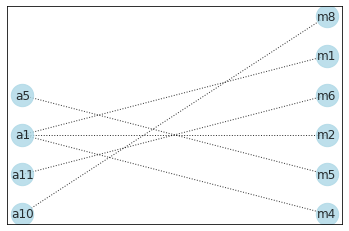

In [46]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [47]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [49]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    count = []
    for nodes in graph.nodes():
      if 'm' in nodes:
        count.append(nodes)
    cost_2= (1/number_of_clusters)*(graph.number_of_edges()/len(count))
    
    return cost_2

<font color='cyan'>Grader function - 4</font>

In [50]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

# Task - 1

<font color='blue'>Grouping similar actors</font>

In [63]:
from sklearn.cluster import KMeans
cost = []
for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
        algo = KMeans(n_clusters=number_of_clusters, init="k-means++")
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
        algo.fit(actor_embeddings) 
        
        cluster_labels = algo.labels_
        unique_clusters = np.unique(cluster_labels)
        actor_nodes_in_clusters = dict(zip(actor_nodes,cluster_labels))
        
        
        K_clusters = []
        for n in unique_clusters:
          cluster = []
          for i,j in actor_nodes_in_clusters.items():
            if j == n:
              cluster.append(i)
          K_clusters.append(cluster)
        
        
        updated_cost1 = 0
        updated_cost2 = 0
        for each_cluster in K_clusters:
          create_graph = nx.Graph()
          for nodes in each_cluster:
            ego = nx.ego_graph(B,nodes)
            create_graph.add_nodes_from(ego.nodes())
            create_graph.add_edges_from(ego.edges())
          c1 = cost1(create_graph,number_of_clusters)
          c2 = cost2(create_graph,number_of_clusters)
          updated_cost1 = updated_cost1+c1
          updated_cost2 = updated_cost2+c2
        metric_cost = updated_cost1*updated_cost2
        print("For no of Cluster = ", number_of_clusters, "metric_cost = ", metric_cost)
        cost.append(metric_cost)

For no of Cluster =  3 metric_cost =  3.7412392516909434
For no of Cluster =  5 metric_cost =  3.050350868343052
For no of Cluster =  10 metric_cost =  2.3329798852368415
For no of Cluster =  30 metric_cost =  1.7613342274489674
For no of Cluster =  50 metric_cost =  1.5506837150623283
For no of Cluster =  100 metric_cost =  1.566422884170436
For no of Cluster =  200 metric_cost =  1.6013447692583518
For no of Cluster =  500 metric_cost =  1.7569716261261896


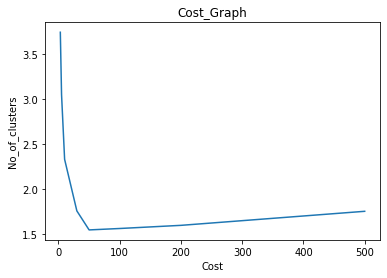

In [67]:
x = [3, 5, 10, 30, 50, 100, 200, 500]
y = cost
plt.xlabel('Cost')
plt.ylabel('No_of_clusters')
plt.title('Cost_Graph')
plt.plot(x,y)

<font color='blue'>Displaying similar actor clusters</font>

In [68]:
Tuned_algo = KMeans(n_clusters=3,init='k-means++', random_state=0)
Tuned_algo.fit(actor_embeddings) 
clusture_no_for_every_datapoint= Tuned_algo.fit_predict(actor_embeddings)

In [70]:
actor_labels = pd.DataFrame(actor_embeddings)
actor_labels['cluster'] = clusture_no_for_every_datapoint

<font color='blue'>Running TSNE with diffrent parameters until stablization</font>

<Figure size 720x720 with 0 Axes>

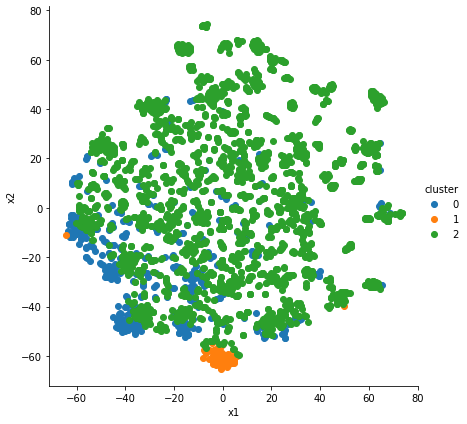

In [75]:
import seaborn as sns
from sklearn.manifold import TSNE
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

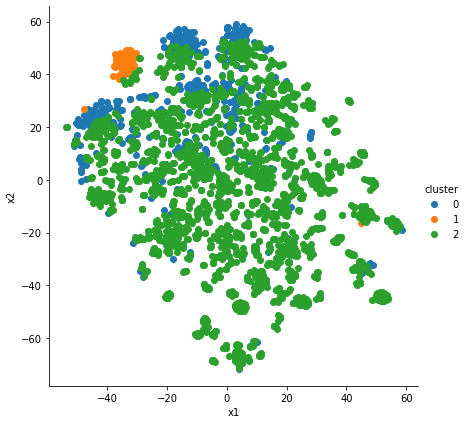

In [76]:
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=50).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

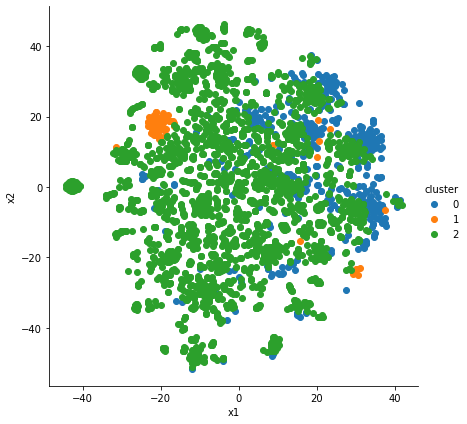

In [77]:
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=100).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

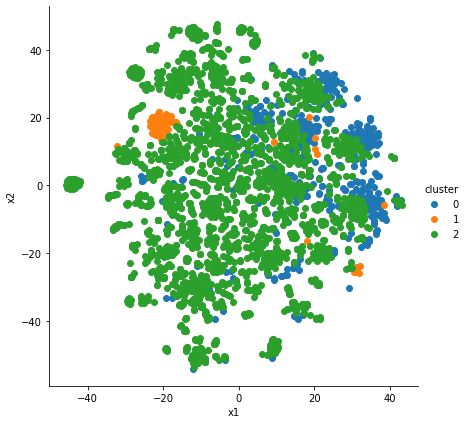

In [78]:
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=100, n_iter = 1500).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

## Task -2

<font color='blue'>Grouping similar movies</font>

In [79]:
from sklearn.cluster import KMeans
cost = []
for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
        algo = KMeans(n_clusters=number_of_clusters, init="k-means++")
        # you will be passing a matrix of size N*d where N number of Movie nodes and d is dimension from gensim
        algo.fit(movie_embeddings) 
        
        cluster_labels = algo.labels_
        unique_clusters = np.unique(cluster_labels)
        actor_nodes_in_clusters = dict(zip(actor_nodes,cluster_labels))
        
        
        K_clusters = []
        for n in unique_clusters:
          cluster = []
          for i,j in actor_nodes_in_clusters.items():
            if j == n:
              cluster.append(i)
          K_clusters.append(cluster)
        
        
        updated_cost1 = 0
        updated_cost2 = 0
        for each_cluster in K_clusters:
          create_graph = nx.Graph()
          for nodes in each_cluster:
            ego = nx.ego_graph(B,nodes)
            create_graph.add_nodes_from(ego.nodes())
            create_graph.add_edges_from(ego.edges())
          c1 = cost1(create_graph,number_of_clusters)
          c2 = cost2(create_graph,number_of_clusters)
          updated_cost1 = updated_cost1+c1
          updated_cost2 = updated_cost2+c2
        metric_cost = updated_cost1*updated_cost2
        print("For no of Cluster = ", number_of_clusters, "metric_cost = ", metric_cost)
        cost.append(metric_cost)

For no of Cluster =  3 metric_cost =  2.352236548790321
For no of Cluster =  5 metric_cost =  1.7816249968367053
For no of Cluster =  10 metric_cost =  1.0364248039597197
For no of Cluster =  30 metric_cost =  0.5842614001333236
For no of Cluster =  50 metric_cost =  0.5654201473581396
For no of Cluster =  100 metric_cost =  0.581980804896407
For no of Cluster =  200 metric_cost =  0.6930555022539937
For no of Cluster =  500 metric_cost =  0.8432175023802305


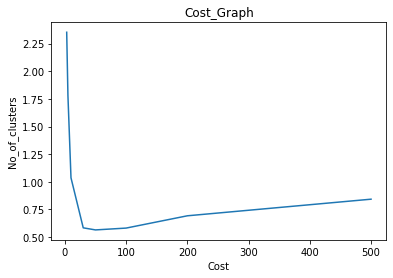

In [80]:
x = [3, 5, 10, 30, 50, 100, 200, 500]
y = cost
plt.xlabel('Cost')
plt.ylabel('No_of_clusters')
plt.title('Cost_Graph')
plt.plot(x,y)

<font color='blue'>Displaying similar movie clusters</font>

In [81]:
Tuned_algo = KMeans(n_clusters=3,init='k-means++', random_state=0)
Tuned_algo.fit(movie_embeddings) 
clusture_no_for_every_datapoint= Tuned_algo.fit_predict(movie_embeddings)
movie_labels = pd.DataFrame(movie_embeddings)
movie_labels['cluster'] = clusture_no_for_every_datapoint

<font color='blue'>Running TSNE with diffrent parameters until stablization</font>

<Figure size 720x720 with 0 Axes>

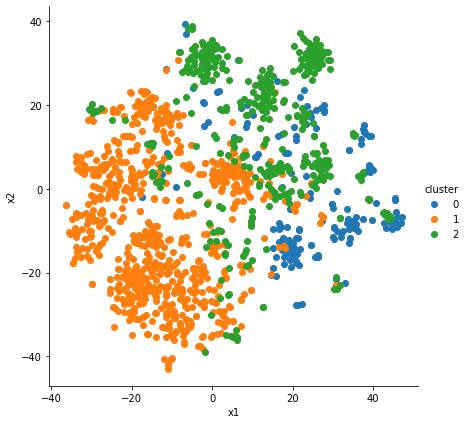

In [82]:
X = movie_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

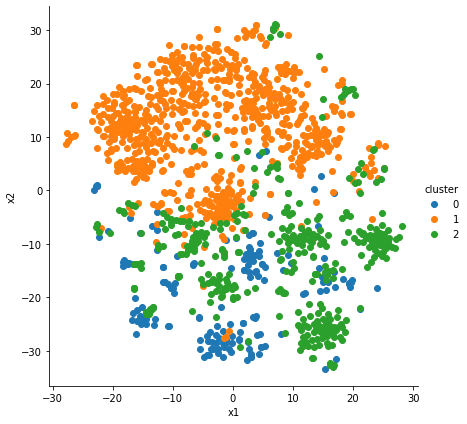

In [83]:
X = movie_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=50).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

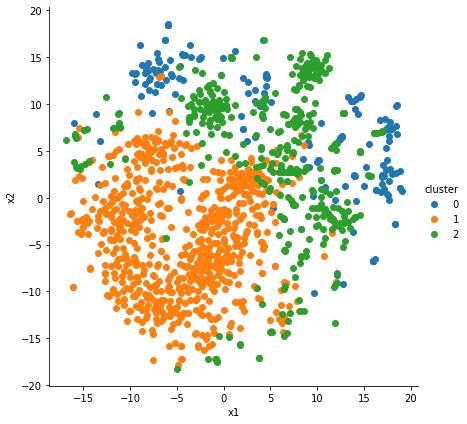

In [84]:
X = movie_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=100).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()

<Figure size 720x720 with 0 Axes>

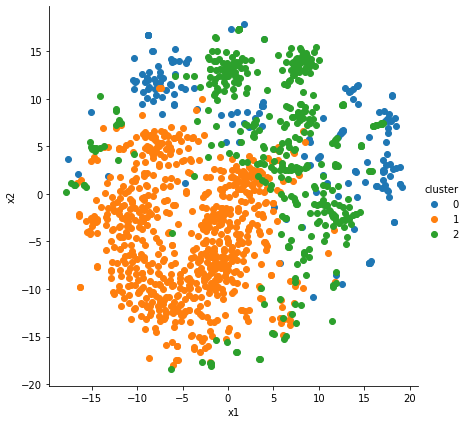

In [85]:
X = movie_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2, random_state=0, perplexity=100,n_iter=1500).fit_transform(X)


dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))

sns.FacetGrid(dftsne, hue="cluster", size=6).map(plt.scatter, 'x1', 'x2').add_legend()

plt.show()